In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, sys


%matplotlib inline

data_train=pd.read_csv('mnist_train_10k.csv',header=0, sep=',')

In [4]:
data_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


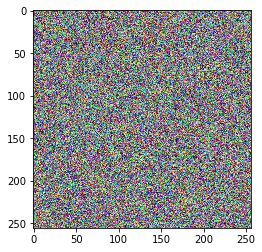

In [5]:
#The first thing we'll do is generate a random image and look at it.
#Student: generate 
#a 3-dimensional random array of integers in the range of [0,255]
x =256
y =256
d=3

rand_img =np.random.randint(0,256,size=(x,y,d),dtype='int')

img =plt.imshow(rand_img, interpolation='nearest')

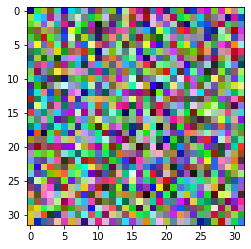

In [6]:
#another way
#Now do it again with a much smaller grid to see how it looks
x=32
y=32
d=3

rand_img = np.random.randint(0,256,size=(x,y,d),dtype='int')
img = plt.imshow(rand_img, interpolation='nearest')

In [8]:
train=data_train

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.shape

(10000, 785)

In [36]:
len(X_train.iloc[0].values)

784

In [34]:
X_train.iloc[0]
len(X_train.iloc[0])
X_train.iloc[0].values


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  29,  10,   0,   0,   0,   0,   0,   0,
         0, 170, 216,  91,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 253, 122,  13,   0,   

In [29]:
from sklearn.model_selection import train_test_split

val_pct = 0.1
X = train.drop('label',1)
y = train.label
X_train , X_val, y_train, y_val= train_test_split(X,y,test_size=val_pct )

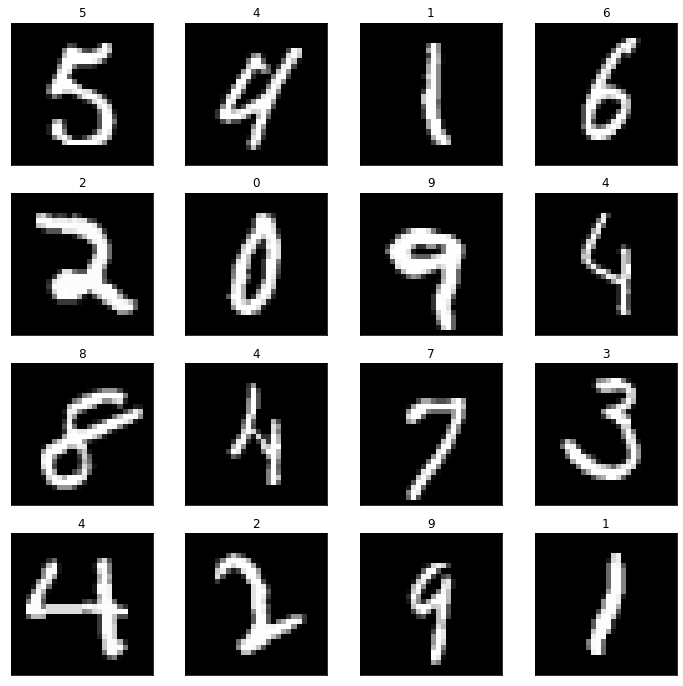

In [11]:
#First let's build a function that converts a vector
#into an image matrix and plots it
def plot_vector(vec):
    
    v_sq = np.reshape(vec, (28,28))
    plt.imshow(v_sq, interpolation='nearest',cmap = 'gray')
#plot the first few number images along with their label.
s = 16
fig = plt.figure(figsize=(12,12))
for i in range(16):
    fig.add_subplot(4,4,i+1)
    plot_vector(X_train.iloc[i].values)
    plt.title(str(y_train.iloc[i]))
    plt.xticks([])
    plt.yticks([])
               

In [12]:
def plot_vector(vec):
    v_sq = np.reshape(vec, (28,28))

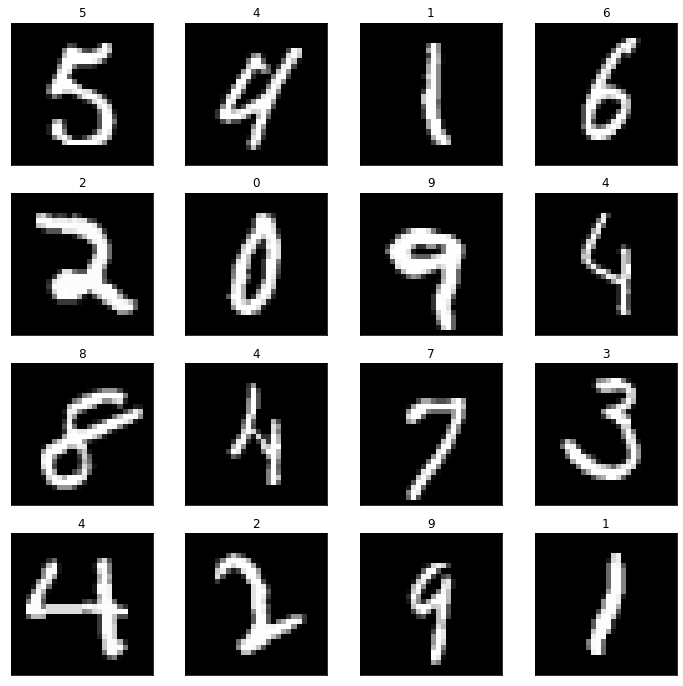

In [13]:
#First let's build a function that converts a vector into an image matrix and plots it

def plot_vector(vec):
    '''
    Takes in image vector, transforms and plots
    '''
    v_sq = np.reshape(vec, (28,28))
    plt.imshow(v_sq, interpolation='nearest', cmap = 'gray')

#plot the first few number images along with their label.
s = 16
fig = plt.figure(figsize=(12,12))
for i in range(16):
    fig.add_subplot(4, 4, i + 1)
    plot_vector(X_train.iloc[i].values)
    plt.title(str(y_train.iloc[i]))
    plt.xticks([])
    plt.yticks([])

In [15]:
def get_no_variance_feature(df):
    desc_df=df.describe()
    return desc_df.loc['std'][(desc_df.loc['std']==0)].index.values

drop_list = get_no_variance_feature(X_train)

X_train_filt=X_train.drop(drop_list,1)
X_val_filt=X_val.drop(drop_list,1)

X_train.shape, X_train_filt.shape

((9000, 784), (9000, 673))

In [16]:
df_std=X_train.describe().loc['std']
df_std.sort_values(ascending=False , inplace= True)
top4_list = df_std.index.values[0:4]

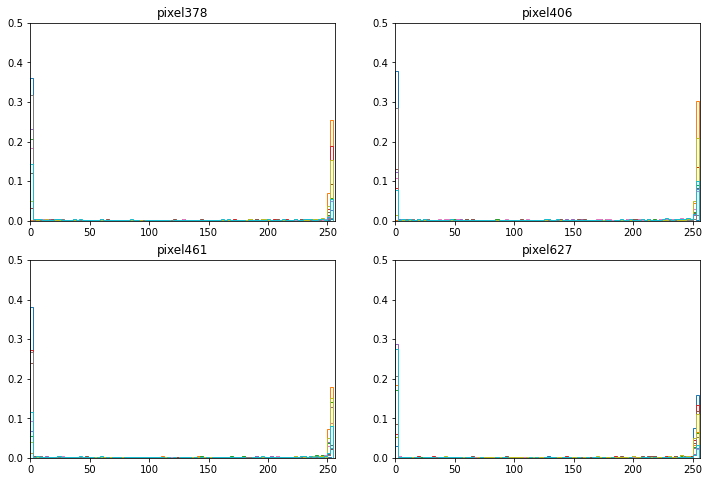

In [17]:
Y_labels = range(10)
fig= plt.figure(figsize=(12,8))
for i,var in enumerate(top4_list):
    ax=fig.add_subplot(2,2,i+1)
    ax.set_xlim([0,256])
    ax.set_ylim([0,0.5])
    for y in Y_labels:
        plt.hist(X_train[var][(y_train==y)],
bins=100, density=True, histtype='step')
        plt.title(var)

In [18]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

#Next let's build the model
oval = OneVsRestClassifier(LogisticRegression())
oval.fit(X_train_filt, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

OneVsRestClassifier(estimator=LogisticRegression())

In [19]:
oval.__dict__.keys(),len(oval.estimators_)

(dict_keys(['estimator', 'n_jobs', 'label_binarizer_', 'classes_', 'estimators_']),
 10)

In [20]:
oval.estimators_[0:3]

[LogisticRegression(), LogisticRegression(), LogisticRegression()]

In [21]:
#First execute this function
import itertools
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matix',
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    acc = np.diag(cm).sum()/float(cm.sum())
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('{},Acc={}'.format(title,acc))
    
     #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        
    thresh =cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i,j],3),
        horizontalalignment='center',
        color='white' if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
    
    
    
    
    
    
    

In [22]:
conda install itertools

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - itertools

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


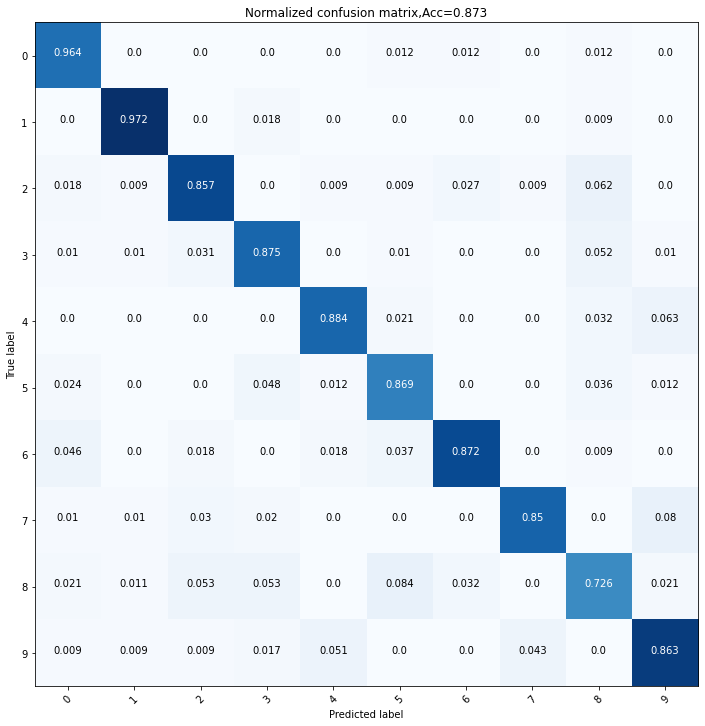

In [23]:
from sklearn.metrics import confusion_matrix

#Next, predict the class on validation data and generate the confusion_matrix

preds_ova= oval.predict(X_val_filt)
cm = confusion_matrix(y_val,preds_ova, labels=range(10))

#Now use the function above to plot it

np.set_printoptions(precision=3)
plt.figure(figsize =(10,10))
plot_confusion_matrix(cm, classes=range(10),normalize=True,
                     title="Normalized confusion matrix")
plt.show()

In [28]:
Xs.shape[0]

NameError: name 'Xs' is not defined

In [ ]:
#Visualize errors where (pred, true) in [(2,6), (8,2),(8,1)]
pred_true_list = [(2,6),(8,2),(8,1)]
'''
Loop through the above list of tuples.
Filter out the validation records where the prediction is the first element, and the truth is the second
Then call the plot_vector function to visualize
Add a title showing prediction and truth
'''

for pt in pred_true_list:
    Xs= X_val[(y_val==pt[1])&(preds_ova==pt[0])]
    for i in range(Xs.shape[0]):
        plt.figure()
        plot_vector(Xs.iloc[i].values)
        plt.title("pred:{},truth:{}".format(pt[0],pt[1]))

This accuracy is pretty good for an untuned LR on a sample of data. Can we do better with a random forest? 
Without running first, why might a RF do bettr in this case?

This should conclude Part 1
RF

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators =200)
rf.fit(X_train_filt, y_train)

RandomForestClassifier(n_estimators=200)

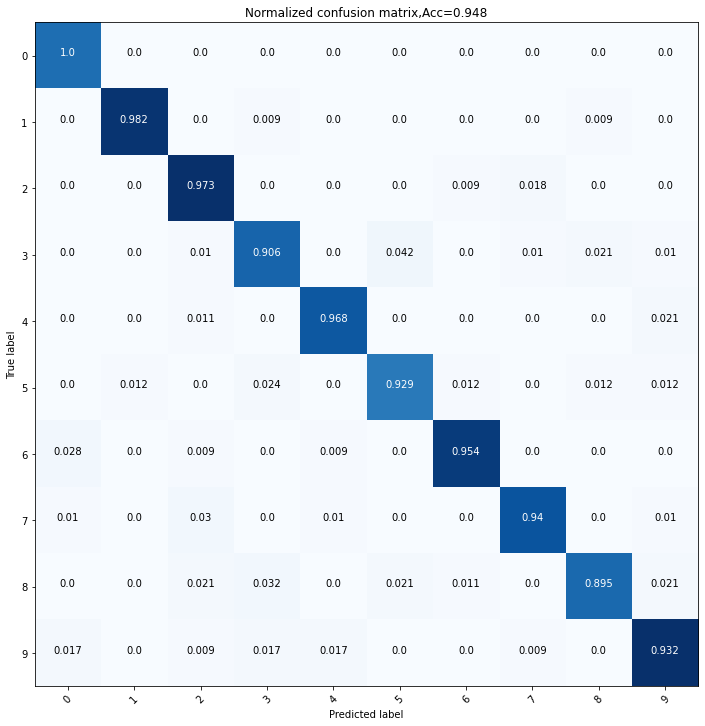

In [27]:
#Get the predictions and a confusion matrix, and plot like was done above
preds_rf= rf.predict(X_val_filt)
cm_rf = confusion_matrix(y_val,preds_rf, labels=range(10))

#Now use the function above to plot it

np.set_printoptions(precision=3)
plt.figure(figsize =(10,10))
plot_confusion_matrix(cm_rf, classes=range(10),normalize=True,
                     title="Normalized confusion matrix")
plt.show()